<a href="https://colab.research.google.com/github/hannahsophieMWB/machine_learning_MiT/blob/main/FDS_Project_LearnerNotebook_FullCode_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# mount GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding the structure of the data

In [ ]:

# read the data
df = pd.read_csv('/content/drive/MyDrive/AI and Machine Learning/MiT Course/Week 1/Final Submission/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]



In [ ]:
# Write your code here
rows, columns = df.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 1898
Number of columns: 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:


*   The Dataframe has a total of 9 columns with types: float, integer and string.





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Identify missing values
missing_values = df.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64



#### Observations:


*   There are no missing values in the Dataframe.




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Statistical summary of the data
full_summary = df.describe().T # for numeric data
print("The statistical summary of the data is:", full_summary)

# For categorical data

df.describe(exclude = 'number').T




The statistical summary of the data is:                         count          mean            std         min  \
order_id               1898.0  1.477496e+06     548.049724  1476547.00   
customer_id            1898.0  1.711685e+05  113698.139743     1311.00   
cost_of_the_order      1898.0  1.649885e+01       7.483812        4.47   
rating                 1898.0  2.659642e+00       2.195280        0.00   
food_preparation_time  1898.0  2.737197e+01       4.632481       20.00   
delivery_time          1898.0  2.416175e+01       4.972637       15.00   
order_count            1898.0  1.000000e+00       0.000000        1.00   
total_time             1898.0  5.153372e+01       6.833603       35.00   

                              25%         50%           75%         max  
order_id               1477021.25  1477495.50  1.477970e+06  1478444.00  
customer_id              77787.75   128600.00  2.705250e+05   405334.00  
cost_of_the_order           12.08       14.14  2.229750e+01       35.41

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
weekend,1898,2,True,1351


In [ ]:
# Minimum, average, and maximum for food preparation

summary = df['food_preparation_time'].describe()

minimum_time = summary['min']
average_time = summary['mean']
maximum_time = summary['max']

print("Minimum food preparation time:", round(minimum_time, 2), 'minutes')
print("Average food preparation time:", round(average_time,2) , 'minutes')
print("Maximum food preparation time:", round(maximum_time,2), 'minutes')

Minimum food preparation time: 20.0 minutes
Average food preparation time: 27.37 minutes
Maximum food preparation time: 35.0 minutes


#### Observations:

*   The food preparation time varies between 20.0 min and 35.0 min with an average of 27.4 min.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Count the unique values of the 'rating' column
unique_ratings = df['rating'].value_counts()

print("Count of unique ratings:")
print(unique_ratings)


Count of unique ratings:
Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


#### Observations:


*   A total of 736 orders are not rated.




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [1]:
# Increase the figure size
plt.figure(figsize=(7, 5))

# Show the top N restaurants only to ensure readability
top_n = 20
top_restaurants = df['restaurant_name'].value_counts().head(top_n).index
sns.countplot(
    y=df[df['restaurant_name'].isin(top_restaurants)]['restaurant_name'],
    order=top_restaurants
)

plt.title('Top 20 Restaurant Counts')
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.show()

NameError: ignored

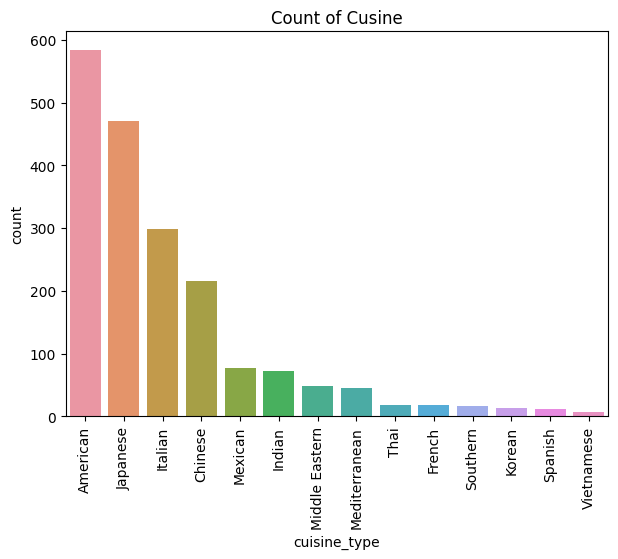

In [ ]:
# Countplot for categorical variable ('cuisine_type	')
plt.figure(figsize=(7, 5))
top_cuising = df['cuisine_type'].value_counts().head(top_n).index
sns.countplot(x=df['cuisine_type'], order = top_cuising)
plt.title('Count of Cusine')
plt.xticks(rotation=90) # to change the xlabels
plt.show()





Observation:


*   The top 3 cuisine types are 'American', 'Japanese' and 'Italian'.



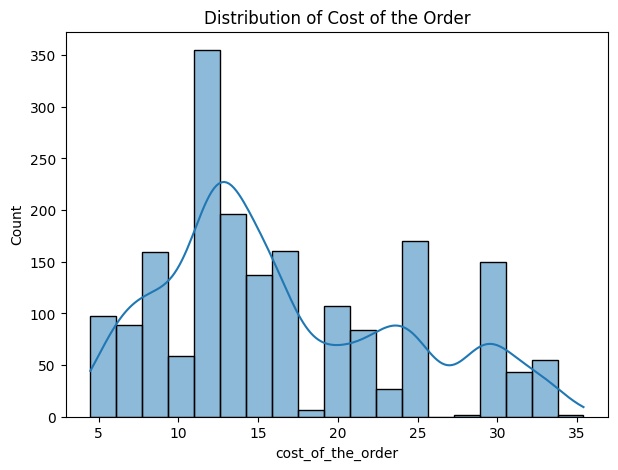

In [ ]:
# Histogram for numerical variable ('cost_of_the_order')
plt.figure(figsize=(7, 5))
sns.histplot(df['cost_of_the_order'], kde=True)
plt.title('Distribution of Cost of the Order')
plt.show()



Observation:


*   The cost of the orders varies from USD 5 to USD 35 with a slight right tailed distribution. A higher count of orders between USD 12 and USD 14 can be observed.

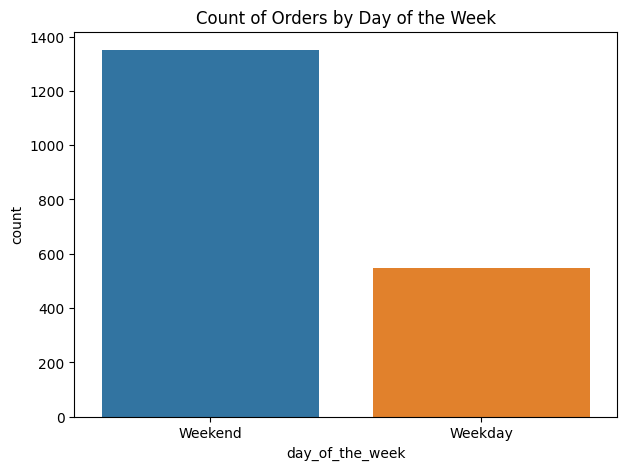

In [ ]:

# Countplot for categorical variable ('day_of_the_week')
plt.figure(figsize=(7, 5))
sns.countplot(x=df['day_of_the_week'])
plt.title('Count of Orders by Day of the Week')
plt.show()



Observation:


*   The majority of orders occurs on the weekend with over 1.2k orders compared to ~600 orders on weekdays.

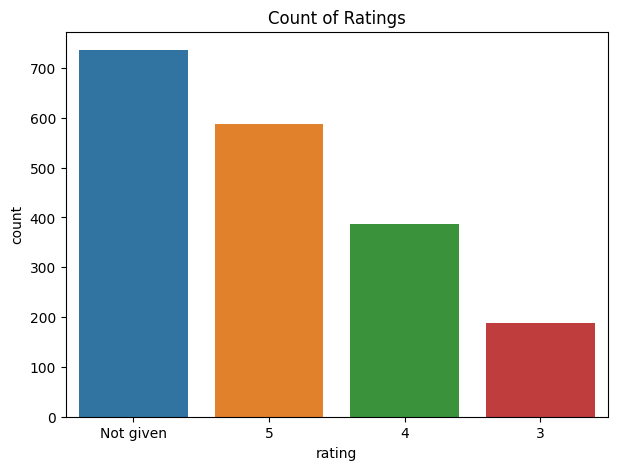

In [ ]:
# Countplot for another categorical variable ('rating')
plt.figure(figsize=(7, 5))
order =  df['rating'].value_counts().head(top_n).index
sns.countplot(x=df['rating'], order = order)
plt.title('Count of Ratings')
plt.show()



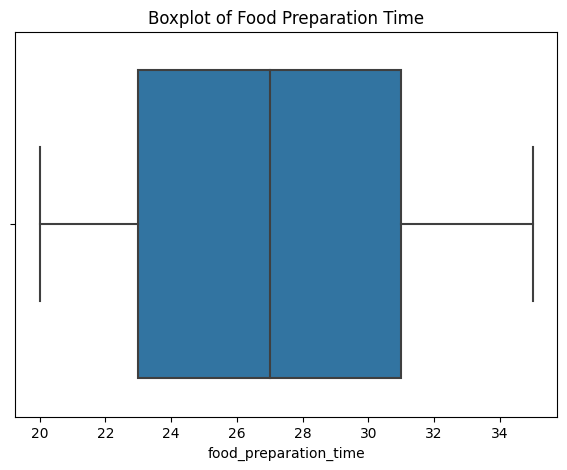

In [ ]:

# Boxplot for a numerical variable ('food_preparation_time')
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['food_preparation_time'])
plt.title('Boxplot of Food Preparation Time')
plt.show()



Obervation:


*   The Boxplot for Food preparation time shows a normal distribution with no outliers ranging from  ~23 min to  ~31 min.

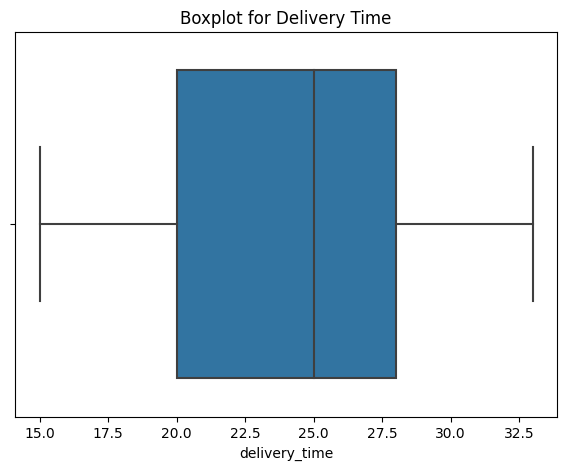

In [ ]:
# Boxplot for delivery time
plt.figure(figsize = (7,5))
sns.boxplot(x=df['delivery_time'])
plt.title('Boxplot for Delivery Time')
plt.show()

Observation: The boxplot for delivery time shows a slight left skwed distribution with no outliers and a range from ~20 min to ~28 min.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Groupby  restaurant_name and count the order_id's
top_restaurant = df.groupby('restaurant_name')['order_id'].count().nlargest(5)

print('The top 5 restaurants are: ' )
top_restaurant



The top 5 restaurants are: 


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Groupby cuisine and filter on column  and count the orders

# Filter the dataframe for 'Weekend'
weekend_order = df[df['day_of_the_week'] == 'Weekend']

# Group by cusine and count order_id
cusine = weekend_order.groupby('cuisine_type')['order_id'].count()


# Get the top cuisine
top_cuisine_weekends = cusine.nlargest(1)

print('The top cuisine on weekends is: ')
top_cuisine_weekends



The top cuisine on weekends is: 


cuisine_type
American    415
Name: order_id, dtype: int64

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Boolean value for > 20 dollars

above_20_USD = df['cost_of_the_order'] > 20

# Count how many times the condition is True
count_over_20 = above_20_USD.sum()

# Calculate the proportion
proportion_over_20 = count_over_20 / len(df)

# Convert to percentage
percentage_over_20 = proportion_over_20 * 100

print(f"The percentage of orders above USD 20 is: {percentage_over_20:.2f}%")


The percentage of orders above USD 20 is: 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Mean on column delivery time

mean = df['delivery_time'].mean()

print('The mean for delivery time is:', round(mean,2), 'minutes')


The mean for delivery time is: 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Group by most frequest orders of customers

top_3 = df.groupby('customer_id')['order_id'].count().nlargest(3)

print('The top 3 customer IDs are:')
top_3

The top 3 customer IDs are:


customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

#### Observations: The top 3 customer IDs and number of orders are:



*   ID 52832: 13 orders
*   47440: 10 orders
*   83287: 9 orders




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


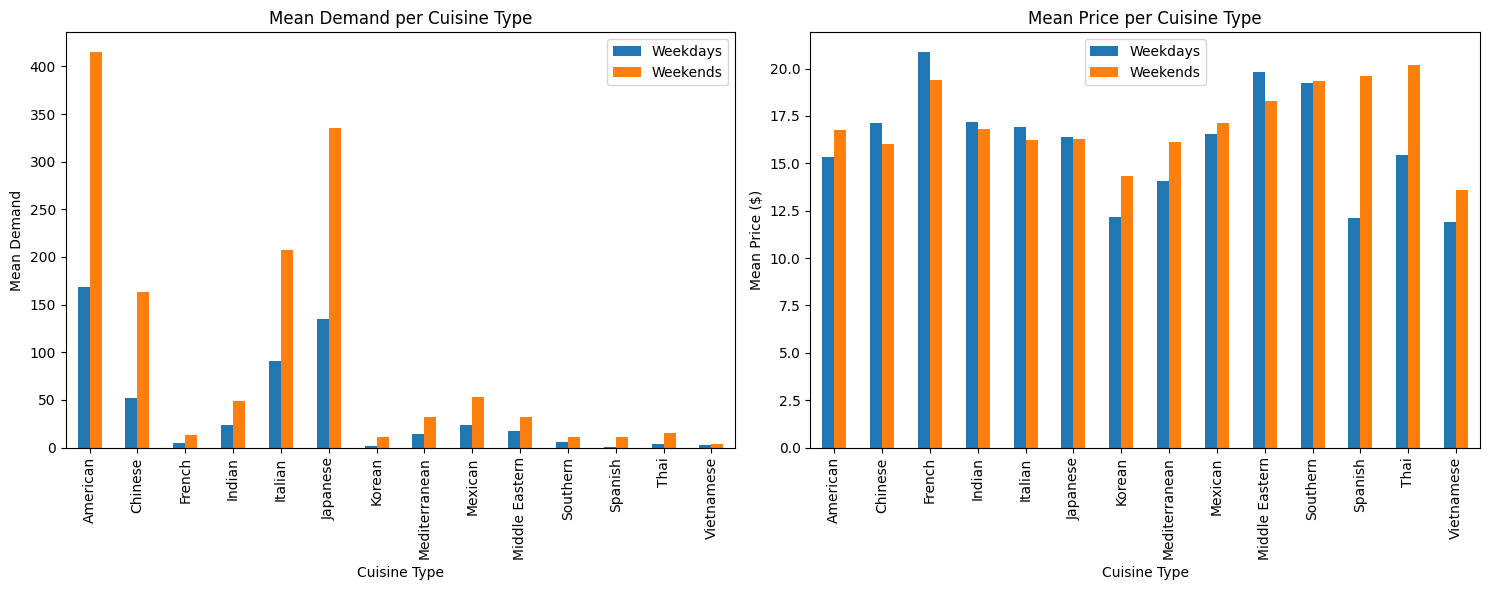

In [ ]:
# Group by cuisine type and weekend/weekday, then count orders and average cost
grouped = df.groupby(['cuisine_type', 'weekend']).agg(mean_demand=('order_id', 'count'),
                                                      mean_price=('cost_of_the_order', 'mean')).reset_index()

# Pivot the data for easy plotting
pivot_demand = grouped.pivot(index='cuisine_type', columns='weekend', values='mean_demand')
pivot_price = grouped.pivot(index='cuisine_type', columns='weekend', values='mean_price')

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Mean Demand Plot
pivot_demand.plot(kind='bar', ax=axes[0])
axes[0].set_title('Mean Demand per Cuisine Type')
axes[0].set_ylabel('Mean Demand')
axes[0].set_xlabel('Cuisine Type')
axes[0].legend(['Weekdays', 'Weekends'])  # Renaming the legend to be more descriptive

# Mean Price Plot
pivot_price.plot(kind='bar', ax=axes[1])
axes[1].set_title('Mean Price per Cuisine Type')
axes[1].set_ylabel('Mean Price ($)')
axes[1].set_xlabel('Cuisine Type')
axes[1].legend(['Weekdays', 'Weekends'])  # Renaming the legend to be more descriptive

plt.tight_layout()
plt.show()

Observation:


*   The average demand more than doubles for all cuisines on weekends.
*   The average price however only incrreases slighgtly on weekends compared to weekdays.



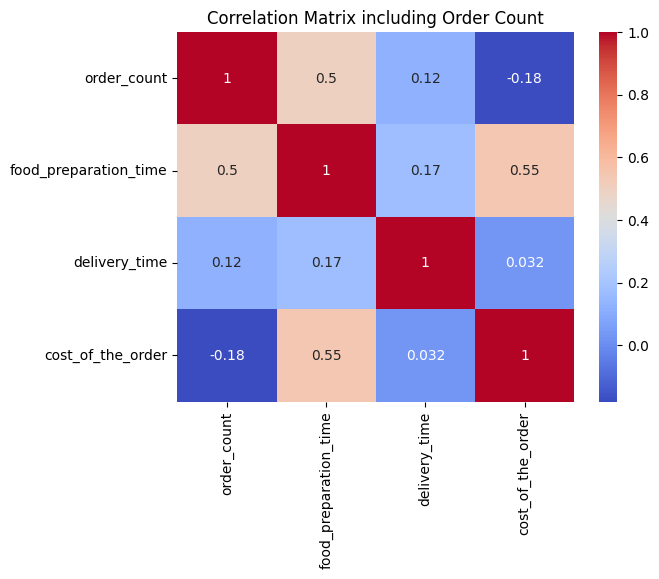

In [ ]:

# Add a column 'order_count' which will be 1 for each row, to later sum for counting
df['order_count'] = 1

# New DataFrame with the sum of 'order_count' and mean of other variables grouped by cuisine type
grouped_df = df.groupby('cuisine_type').agg({
    'order_count': 'sum',  # Summing up the order count for each cuisine type
    'food_preparation_time': 'mean',
    'delivery_time': 'mean',
    'cost_of_the_order': 'mean'
}).reset_index()

# Correlation matrix for the grouped data
correlation_matrix_grouped = grouped_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix_grouped, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix including Order Count')
plt.show()

Observation:



*   Based on the  heatmap, it seems that there is a moderate positive correlation between food preparation time and the cost of the order (0.55), as well as between food preparation time and the number of orders (0.5).

*  Longer preparation times correlate with more orders indicating a perceived higher quality of food rather than speed of delivery.


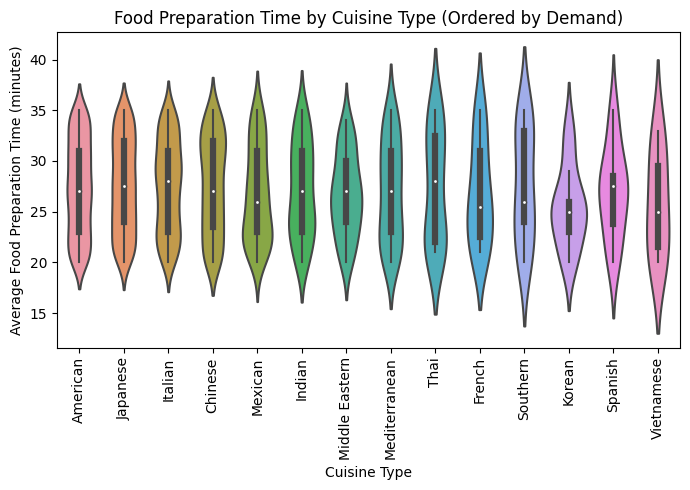

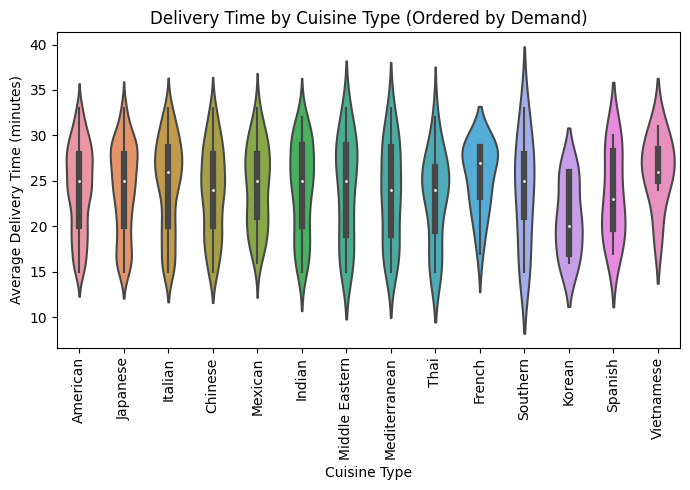

In [ ]:
# DEMAND: ORDER PREPARATION AND DELIVERY TIME BY CUISINE TYPE

# Order Counts by Cuisine Type
order_counts_by_cuisine = df.groupby('cuisine_type')['order_id'].nunique().reset_index(name='order_count')

# Sort the cuisines by order count in descending order
order_counts_by_cuisine = order_counts_by_cuisine.sort_values('order_count', ascending=False)


# Get the order of cuisines by number of orders
cuisine_order = order_counts_by_cuisine['cuisine_type'].tolist()

# Create the violin plot for food preparation time, ordered by cuisine popularity
plt.figure(figsize=(7, 5))
sns.violinplot(x='cuisine_type', y='food_preparation_time', data=df, order=cuisine_order)
plt.title('Food Preparation Time by Cuisine Type (Ordered by Demand)')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Average Food Preparation Time (minutes)')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

# Create the violin plot for delivery time, ordered by cuisine popularity
plt.figure(figsize=(7, 5))
sns.violinplot(x='cuisine_type', y='delivery_time', data=df, order=cuisine_order)
plt.title('Delivery Time by Cuisine Type (Ordered by Demand)')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Average Delivery Time (minutes)')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


Observation:


*   The violin plots show the average food preparation and delivery time by cuisine type ordered by demand.
*   The top 3 cuisines show an evenly distributed food preparation and delivery time indicating that these restaurants are working efficiently and customers migh value the predictability of order time and delivery time (since the demand is higher). To understand what else might affect demand other than a possible preference for quality and predictability, we need to understand the price sensitivity of customers.

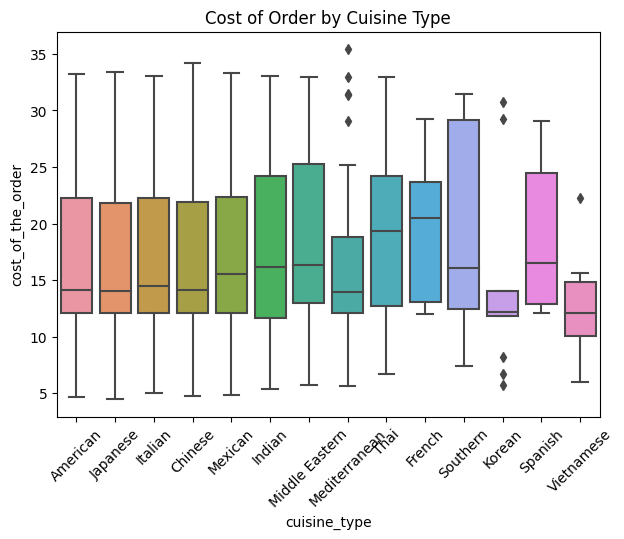

In [ ]:
# PRICE SENSITIVITY: CUISINE TYPES BY COST

# Count the number of orders for each cuisine type
cuisine_order_counts = df['cuisine_type'].value_counts().index

# Relationship between cost of order split by cuisine types and ordered by number of orders to understand demand for different cuisines and willigness to pay
plt.figure(figsize=(7, 5))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, order=cuisine_order_counts)
plt.title('Cost of Order by Cuisine Type')
plt.xticks(rotation=45)
plt.show()


Observation:


*   For visualizing the relationship between the cost of an order and customer_id, split by cuisine types, we would typically want to show how much different customers are willing to pay for various types of cuisines.  
*  The boxplot shows that the cost for the 3 most ordered cuisines (American, Japanese, Italian) are  distributed similarly with a slight right tailed distribution indicating a similar willingness to pay between USD 14-22.

* Only the middle eastern cusine shows a few outliers, a few customers willing to pay between USD 30-35.

* On average, customers with a preference for french and thai cuisine show the highest willigness to pay with USD ~20  compared to USD ~14 for the top 3 ordered cuisine.

* Customers with a preference for Korean and Vietnamese have the lowest willigness to pay with USD ~13 on average.   

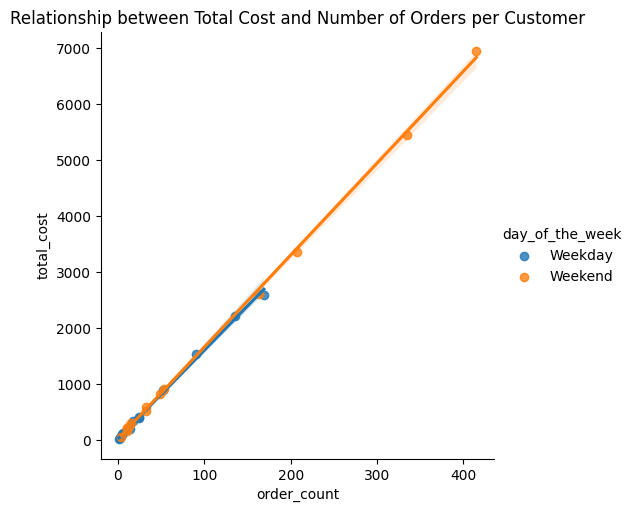

In [ ]:
# PRICE SENSITIVITY

# Group the data and sum the costs, count the orders
grouped_data = df.groupby(['day_of_the_week', 'cuisine_type']).agg(total_cost=('cost_of_the_order', 'sum'),
                                                                   order_count=('order_id', 'count')).reset_index()
# We can use the grouped data from above to create a lmplot to understand price and demand
sns.lmplot(data=grouped_data, x='order_count', y='total_cost', hue='day_of_the_week', aspect=1, height=5)

#  Set the plot title and adjust the plot if necessary
plt.title('Relationship between Total Cost and Number of Orders per Customer')
plt.show()


Observation:



*  The lmplot showing a perfect correlation between price and demand which might not be entirely expected in typical market behavior, where price and demand often have an inverse relationship (as price increases, demand usually decreases).
*  However, in the context of restaurant orders, this could indicate that higher spending is associated with a higher frequency of orders, perhaps due to customer loyalty or preference for certain cuisines regardless of cost.

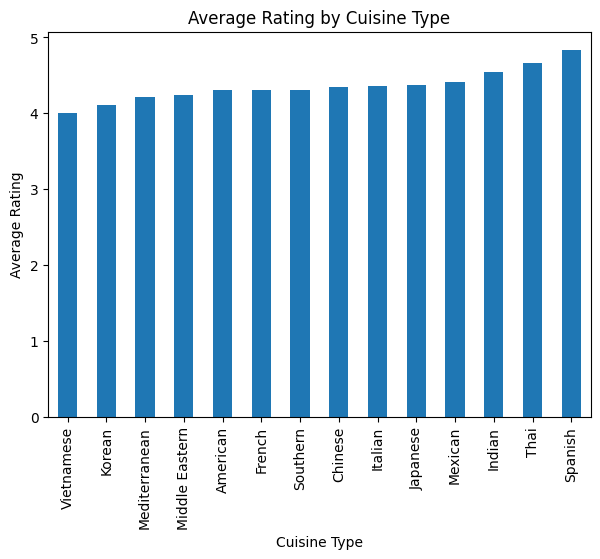

In [ ]:

# Replace 'Not given' ratings with NaN (or another method of your choice)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by cuisine type and calculate the mean rating
cuisine_ratings = df.groupby('cuisine_type')['rating'].mean()
cuisine_ratings_sorted = cuisine_ratings.sort_values(ascending=False)


# Plot the results
plt.figure(figsize=(7, 5))
cuisine_ratings_sorted.sort_values().plot(kind='bar')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.title('Average Rating by Cuisine Type')
plt.show()


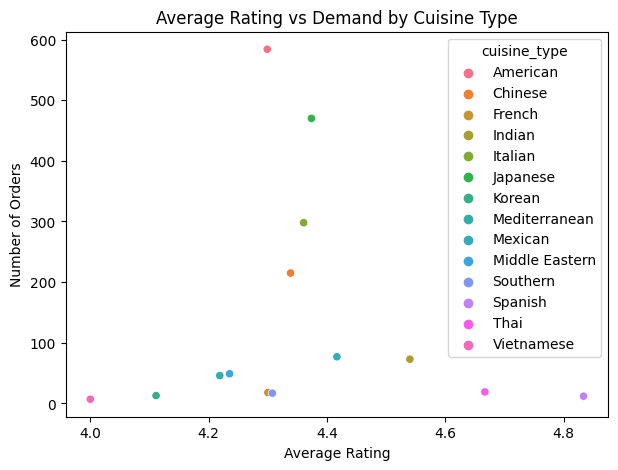

In [ ]:
# DEMAND: RATING AND CUISINE TYPE

# Rating of restaurant: Replate the 'Not given' values with 0
df['rating'] = df['rating'].replace('Not given', 0).astype(float)

# Group by cuisine_type to get average rating and order count
cuisine_demand = df.groupby('cuisine_type').agg({
    'rating': 'mean',
    'order_id': 'count'
}).reset_index()

# Scatter plot for average rating vs number of orders
plt.figure(figsize=(7, 5))
sns.scatterplot(data=cuisine_demand, x='rating', y='order_id', hue = 'cuisine_type')
plt.title('Average Rating vs Demand by Cuisine Type')
plt.xlabel('Average Rating')
plt.ylabel('Number of Orders')
plt.show()


Observation:
Based on the scatter plot, it does appear that there is no strong linear correlation between the average rating and the number of orders (demand) across different cuisine types. The data points do not form a clear upward or downward trend, which would be indicative of a positive or negative correlation, respectively.

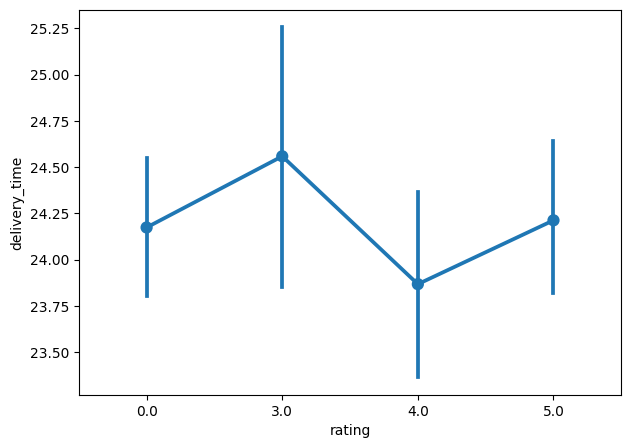

In [ ]:
# DEMAND: RATING AND Delivery and Food preparation time
# Replace missing values in 'rating' with 0
df['rating'].fillna(0, inplace=True)

# Plot
plt.figure(figsize=(7, 5))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

Observation: A high rating seems to be correlated with a delivery time between 24.0 min and 24.75 min.

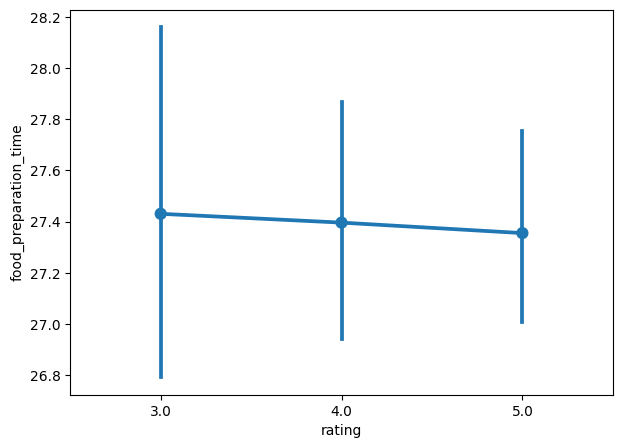

In [ ]:
plt.figure(figsize=(7, 5))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

Observation: The mean food preparation time does not seem to influence the rating much. However, a high rating (5) has a lower variance in food preparation time (between 27 min and 27.8 min) compared to a rating of 3 (between 26.8 and 28.1 min).



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Turn the rating column into a numeric variable and replace 'Not given' values with a 0 to avoid counting

df['rating'] = pd.to_numeric(df['rating'].replace('Not given', None))


# Group by restaurant and use agg function to calculate count and average

promotion = df.groupby('restaurant_name').agg(
    count_rating=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Use multiple filters to filter for restaurants with at least 50 ratings  and average rating > 4


## promotion.info() # to check for type of data which is integer and float

promotion_filters = promotion[
                    (promotion['count_rating'] > 50) &
                    (promotion['average_rating'] > 4)
                     ]


# Restaurants with more than 50 ratings
restaurants_with_enough_ratings = promotion[promotion['count_rating'] > 50]

# Restaurants with an average rating greater than 4
restaurants_with_high_ratings = promotion[promotion['average_rating'] > 4]

# Display the results
print("Restaurants with more than 50 ratings:")
print(restaurants_with_enough_ratings)

print("\nRestaurants with an average rating greater than 4:")
print(restaurants_with_high_ratings)

# Restaurants fullfilling both conditions

print('The following restaurants fullfill both conditions: ')
promotion_filters

Restaurants with more than 50 ratings:
               restaurant_name  count_rating  average_rating
20   Blue Ribbon Fried Chicken            64        4.328125
21           Blue Ribbon Sushi            73        4.219178
136                Shake Shack           133        4.278195
153          The Meatball Shop            84        4.511905

Restaurants with an average rating greater than 4:
              restaurant_name  count_rating  average_rating
0                  'wichcraft             1        5.000000
1                   12 Chairs             2        4.500000
3                   67 Burger             1        5.000000
5                        Amma             2        4.500000
7          Anjappar Chettinad             1        5.000000
..                        ...           ...             ...
171                   Yama 49             4        5.000000
172  Yama Japanese Restaurant             8        4.500000
175                da Umberto             1        5.000000
176 

,restaurant_name,count_rating,average_rating
20,Blue Ribbon Fried Chicken,64,4.328125
21,Blue Ribbon Sushi,73,4.219178
136,Shake Shack,133,4.278195
153,The Meatball Shop,84,4.511905


#### Observations: 4 restaurants fullfill the condition.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Revenue: Profit + cost (or in this case: Cost * Markup in %)

# Restaurants with orders > 20 dollars

df_25 = df[df['cost_of_the_order'] > 20 ]

# New revenue column

df_25['revenue'] = df_25['cost_of_the_order'] * 1.25

# Group by restaurant

df_restaurant_25 = df_25.groupby('restaurant_name').agg(
                Revenue_USD_25 = ('revenue', 'sum')
)


# More efficient code with lambda for 15% on order above 5 USD and below 20USD
df_restaurant_15 = df[df['cost_of_the_order'] > 5 & (df['cost_of_the_order'] < 20)].groupby('restaurant_name').agg(
    Revenue_USD_15=('cost_of_the_order', lambda x: (x * 1.15).sum())
).reset_index()

df_restaurant_15

# Aggregate and sum of total revenue
revenue = pd.merge(df_restaurant_25,df_restaurant_15,how='inner',on='restaurant_name').round(2)


revenue['Total Revenue'] = revenue['Revenue_USD_25'] + revenue['Revenue_USD_15']
revenue_sorted = revenue.sort_values(by='Total Revenue', ascending=False)

revenue_sorted


,restaurant_name,Revenue_USD_25,Revenue_USD_15,Total Revenue
86,Shake Shack,2101.38,4116.46,6217.84
98,The Meatball Shop,1225.59,2466.99,3692.58
14,Blue Ribbon Sushi,935.85,2189.54,3125.39
13,Blue Ribbon Fried Chicken,1135.75,1911.63,3047.38
67,Parm,645.54,1279.67,1925.21
...,...,...,...,...
71,Pongsri Thai,25.22,38.21,63.43
87,Socarrat Paella Bar,31.52,29.00,60.52
5,Aurora,27.41,32.97,60.38
72,Posto,30.31,27.89,58.20


#### Observations:
The top 3 restaurants by revenue are Shake Shack (USD 6217.84), The Meatball Shop (USD 3692.58) and Blue Ribbon Sushi (USD 3125.39)

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate the total delivery time: preparation + delivery time

df['total_time'] = df['delivery_time'] +  df['food_preparation_time']

# % of orders above 60 min
order_60 = df[df['total_time'] > 60]

count = order_60['order_id'].count()

percentage = (count / len(df['order_id'])) * 100

print('The percentage of orders above a total time required to deliver the food in % is:', round(percentage,2))


The percentage of orders above a total time required to deliver the food in % is: 10.54


#### Observations: The percentage of orders above a total time required to deliver the food of 60 min in %: 10.54









### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Mean for delivery time on weekdays and weekends

# Group by weekdays and weekends

mean_compare = df.groupby('day_of_the_week').agg(
              mean = ('delivery_time', 'mean')

).reset_index()


# Extract mean values
mean_weekday = mean_compare[mean_compare['day_of_the_week'] == 'Weekday']['mean'].values[0]
mean_weekend = mean_compare[mean_compare['day_of_the_week'] == 'Weekend']['mean'].values[0]

# Calculate the difference
difference = mean_weekday - mean_weekend

print('The mean time of orders for the weekdays and weekends is: ')
round(mean_compare,2)


The mean time of orders for the weekdays and weekends is: 


,day_of_the_week,mean
0,Weekday,28.34
1,Weekend,22.47


In [ ]:
print('The differnece in means is:', round(difference,2), ' min' )

The differnece in means is: 5.87  min


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

We analyzed a dataset of nearly 2K Orders containing food delivery information.

The data covers weekday and weekend information for a set of 178 restaurants. The main features of interest here are the order_ids, ratings, cuisine types and cost given that the food sector wants to get insight into the demand of different restaurants which will help them in enhancing their customer experience. From a business perspective, the price sensitivity show a perfect correlation between price and demand with double the orders on weekends compared to weekday's.  

We have been able to conclude that:

* The most ordered cuisines are American, Japanese, Italian.
* The restaurants with over 50 orders per customer have a rating of between 4.2-4.5.
* Delivery time  seems to impact rating as a delivery time of  ∼24 min is associated with ratings of 4. However, customers giving the highest rating of 5 do not seem to mind a higher delivery or food preparation time.
* The delivery times on weekdays is on average ∼5min longer than on weekends.
* The average delivery time for the most ordered cuisines is ∼25min.  
* The demand for food delivery almost doubles on weekends compared to weekdays wheras the price only increases slightly.
* The preference for cuisine types on weekdays and weekdays stays the same as the most ordered cusines maintain to be American, Japanese and Italian.
* It seems that there is a moderate positive correlation between food preparation time and the number of orders (corr: 0.5). This could suggest that for different cuisines, the time invested in food preparation, so the food quality might be associated to the volume of orders.
* The cost for the 3 most ordered cuisines (American, Japanese, Italian) are distributed similarly with a slight right tailed distribution indicating a similar willingness to pay between USD 14-22.

* The Spanish, Thai and Indian cusine show the highest rating. Since a higher rating for these (>4) seems to be associated with a lower delivery time between 24.00 and 24.24 min but not higher order number, it cannot be said that the rating directly influences demand which is surprising.

* The French, Spanish and Thai cuisine have the highest mean cost.




### Recommendations:


1.  Demand Increase on Weekends: If there is a consistent pattern of demand increasing on weekends, it may provide the opportunity to implement dynamic pricing strategies and increase the price on weekends to enhance revenue. E.g. develop new pricing strategies for the top restaurants by demand for weekends, such as offering a 20% discount for loyal customers, which could encourage even higher demand.

2.  Since the demand almost doubles on weekends, kitchen staff and driver availability must be ensured during this time of the week.

2. Engage in supply negotiations to achieve bulk pricing, which could reduce variable costs associated with additional orders for the top demanded restaurants: American, Japanese and Italisan.

3. Offer priority delivery or exclusive deals to high-value segments to enhance loyalty such as for customers of the French, Thai and Spanish cuisine.

4. Perform customer segmentation to identify distinct groups based on order frequency, average spend, and cuisine preferences.

5. Procure data for orders on an hourly basis to get a better understanding of the demand-supply status and build a machine learning model to accurately predict orders per hour.

6. Procure data on kitchen staff and delivery personel availability to implement a dynamic scheduling system for delivery personnel to ensure faster delivery during high-demand periods such as weekends.


7. Tailor marketing campaigns to highlight cuisines and dishes with the highest ratings and demand, especially during peak times. E.g. use customer data to personalize promotions and recommend dishes based on past orders.



---